# Consumer Complaints: Plotting CFPB data
This notebook reads, analyzes and plots Consumer Financial Protection Bureau data for the month of December 2014.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn
%matplotlib inline

In [3]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

The first 15 entries are shown to give a taste of the data.

In [4]:
consumer_complaints.head(15)


,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN
5,1177162,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Credit Systems International, Inc.",Closed with explanation,Yes,NaN
6,1177154,Credit card,NaN,Billing disputes,NaN,GA,31322.0,Web,12/31/2014,01/07/2015,Amex,Closed with explanation,Yes,NaN
7,1177143,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,AZ,85023.0,Web,12/31/2014,01/07/2015,Speedy Cash Holdings,Closed,Yes,NaN
8,1177140,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045.0,Web,12/31/2014,12/31/2014,"Afni, Inc.",Closed with explanation,Yes,NaN
9,1177139,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77045.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN


### Consumer complaints by Product

In [54]:
products = consumer_complaints.groupby('Product')
products.size()

Product
Bank account or service    1136
Consumer loan               578
Credit card                1100
Credit reporting           2113
Debt collection            2942
Money transfers             107
Mortgage                   3002
Other financial service      14
Payday loan                 141
Prepaid card                 70
Student loan                340
dtype: int64

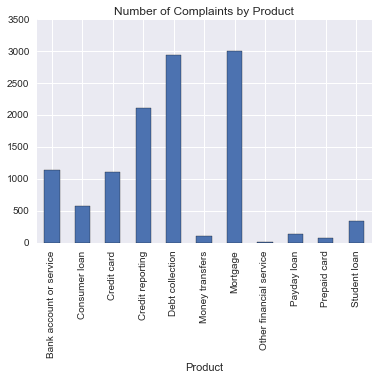

In [53]:
products.size().plot.bar(title="Number of Complaints by Product")

### Consumer complaints by Company
For brevity, only the top 10 most frequent companies are provided.

In [50]:
consumer_complaints['Company'].value_counts()[:10]

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

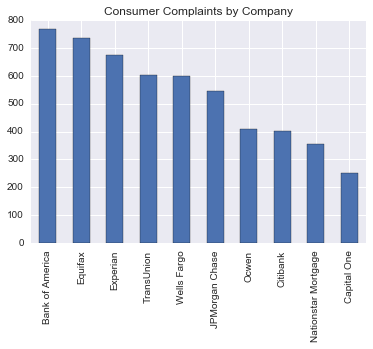

In [52]:
consumer_complaints['Company'].value_counts()[:10].plot.bar(title="Consumer Complaints by Company")

### Number of complaints by company response

In [55]:
consumer_complaints['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
Name: Company response, dtype: int64

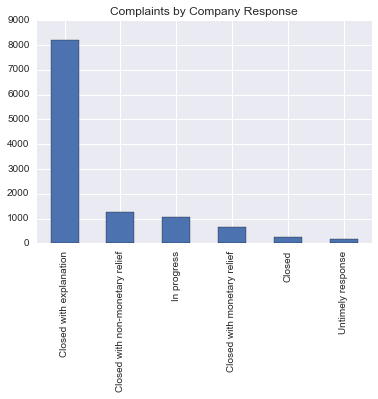

In [58]:
consumer_complaints['Company response'].value_counts().plot.bar(title="Complaints by Company Response")

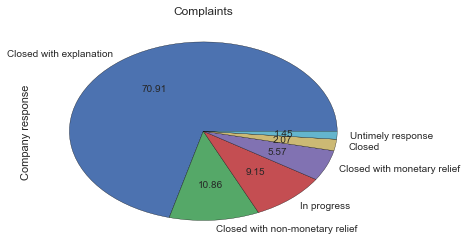

In [61]:
consumer_complaints['Company response'].value_counts().plot.pie(title="Complaints", autopct='%.2f')

### Mean number of complaints by day of week

First, one must get the dates in the 'Date received' series (which are strings) into python's datetime objects. Rather than replace the dates, I add a new series to the data fram called 'date_of_complaint'.

In [89]:
consumer_complaints['date_of_complaint'] = pd.to_datetime(consumer_complaints['Date received'], format='%m/%d/%Y')

In [95]:
complaints_by_date = consumer_complaints['date_of_complaint'].value_counts()

In [97]:
complaints_by_date

2014-12-04    571
2014-12-10    570
2014-12-30    550
2014-12-17    539
2014-12-22    537
2014-12-29    532
2014-12-18    527
2014-12-08    526
2014-12-02    516
2014-12-16    510
2014-12-09    503
2014-12-23    501
2014-12-03    494
2014-12-11    484
2014-12-15    475
2014-12-01    474
2014-12-12    428
2014-12-05    426
2014-12-31    371
2014-12-19    363
2014-12-24    315
2014-12-26    229
2014-12-28    164
2014-12-20    148
2014-12-06    147
2014-12-13    144
2014-12-14    130
2014-12-07    117
2014-12-27    104
2014-12-21     96
2014-12-25     52
Name: date_of_complaint, dtype: int64

Now that the data frame has dates in datetime objects, one can create a new series called 'day_of_week' by mapping the datetime.weekday() method to complaints.

In [99]:
consumer_complaints['day_of_week'] = consumer_complaints['date_of_complaint'].map(lambda d: d.weekday())

Use .head() to peek at the data and see that the two series have been added to the data frame.

In [101]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,date_of_complaint,day_of_week
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2014-12-31,2
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2014-12-31,2
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2014-12-31,2
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2014-12-31,2
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2014-12-31,2


Total number of complaints by day of the week

In [106]:
days_of_the_week = consumer_complaints.groupby('day_of_week')

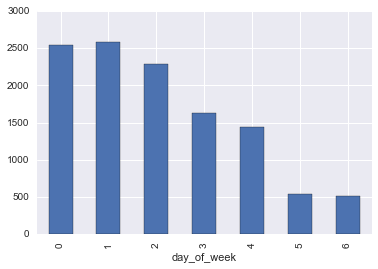

In [108]:
days_of_the_week.size().plot.bar()

Percentage of complaints by day of the week.

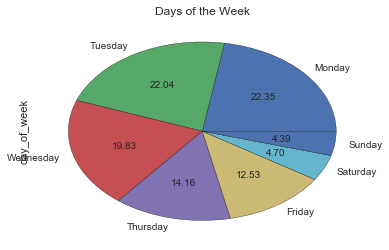

In [114]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
consumer_complaints['day_of_week'].value_counts().plot.pie(title="Days of the Week", labels=days, autopct='%.2f')